In [684]:
import pandas as pd

In [685]:
walk = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Applied Data Science/Weeks 5-8/EPA_SmartLocationDatabase_V3_Jan_2021_Final (1).csv")
health = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Applied Data Science/Weeks 5-8/PLACES__Census_Tract_Data__GIS_Friendly_Format___2024_release_20250426.csv")
nhgis = pd.read_csv("C:/Users/kromi/OneDrive/Bellevue/Applied Data Science/Weeks 5-8/nhgis0001_csv/nhgis0001_csv/nhgis0001_ds262_20225_blck_grp.csv")

In [686]:
print(walk.columns)
print(health.columns)
print(nhgis.columns)

Index(['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA',
       ...
       'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked',
       'D4A_Ranked', 'NatWalkInd', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=117)
Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TractFIPS',
       'TotalPopulation', 'TotalPop18plus', 'ACCESS2_CrudePrev',
       'ACCESS2_Crude95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI',
       'BINGE_CrudePrev', 'BINGE_Crude95CI', 'BPHIGH_CrudePrev',
       'BPHIGH_Crude95CI', 'BPMED_CrudePrev', 'BPMED_Crude95CI',
       'CANCER_CrudePrev', 'CANCER_Crude95CI', 'CASTHMA_CrudePrev',
       'CASTHMA_Crude95CI', 'CHD_CrudePrev', 'CHD_Crude95CI',
       'CHECKUP_CrudePrev', 'CHECKUP_Crude95CI', 'CHOLSCREEN_CrudePrev',
       'CHOLSCREEN_Crude95CI', 'COLON_SCREEN_CrudePrev',
       'COLON_SCREEN_Crude95CI', 'COPD_CrudePrev', 'COPD_Crude95CI',
       'CSMOKING_Crud

In [687]:
print(walk['GEOID20'])
print(health['Geolocation'])
print(nhgis['GEO_ID'])

0         4.811300e+11
1         4.811300e+11
2         4.811300e+11
3         4.811300e+11
4         4.811300e+11
              ...     
220735    7.803100e+11
220736    7.803100e+11
220737    7.803100e+11
220738    7.803100e+11
220739    7.803100e+11
Name: GEOID20, Length: 220740, dtype: float64
0         POINT (-86.4915648 32.4819731)
1          POINT (-86.4724678 32.475758)
2         POINT (-86.4597033 32.4740243)
3         POINT (-86.4448353 32.4710304)
4         POINT (-86.4225578 32.4478607)
                      ...               
83517     POINT (-107.669052 43.8788305)
83518    POINT (-107.9563794 44.0143691)
83519    POINT (-107.9507483 44.0287706)
83520    POINT (-104.5700202 43.8462133)
83521    POINT (-104.2445128 43.8596486)
Name: Geolocation, Length: 83522, dtype: object
0         1500000US010010201001
1         1500000US010010201002
2         1500000US010010202001
3         1500000US010010202002
4         1500000US010010203001
                  ...          
242331    

### Walk Cleaning

In [689]:
# List of FIPS codes to exclude (territories).
territory_fips = [60, 66, 69, 72, 78]

# Remove rows where 'STATEFP' is one of the territory codes.
walk = walk[~walk['STATEFP'].isin(territory_fips)]
walk = walk.reset_index(drop=True)

In [690]:
# Dictionary mapping FIPS codes to State Abbreviations
fips_to_state = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN',
    19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH',
    34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT',
    50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}

# Now create a new column in your walk DataFrame for State Abbreviation
walk['StateAbbr'] = walk['STATEFP'].map(fips_to_state)

In [691]:
# Make sure all parts are strings and properly zero-padded
walk['STATEFP'] = walk['STATEFP'].astype(str).str.zfill(2)
walk['COUNTYFP'] = walk['COUNTYFP'].astype(str).str.zfill(3)
walk['TRACTCE'] = walk['TRACTCE'].astype(str).str.zfill(6)
walk['BLKGRPCE'] = walk['BLKGRPCE'].astype(str).str.zfill(1)

# Now concatenate to form full 12-digit GEOID (Block Group Level)
walk['GEOID'] = walk['STATEFP'] + walk['COUNTYFP'] + walk['TRACTCE'] + walk['BLKGRPCE']

In [692]:
# Keep only the necessary columns
walk = walk[['GEOID', 'StateAbbr', 'CBSA_Name', 'NatWalkInd']]

In [693]:
walk.head()

,GEOID,StateAbbr,CBSA_Name,NatWalkInd
0,481130078254,TX,"Dallas-Fort Worth-Arlington, TX",14.000000
1,481130078252,TX,"Dallas-Fort Worth-Arlington, TX",10.833333
2,481130078253,TX,"Dallas-Fort Worth-Arlington, TX",8.333333
3,481130078241,TX,"Dallas-Fort Worth-Arlington, TX",15.666667
4,481130078242,TX,"Dallas-Fort Worth-Arlington, TX",10.166667


In [694]:
walk['Tract_GEOID'] = walk['GEOID'].str[:11]

# Aggregate Walkability Index by Tract
walk_tract = walk.groupby('Tract_GEOID').agg({
    'NatWalkInd': 'mean'  # Take mean walkability score
}).reset_index()

In [695]:
walk_subset = walk[['Tract_GEOID', 'StateAbbr', 'CBSA_Name']].drop_duplicates()

walk_tract = walk_tract.merge(walk_subset, on = 'Tract_GEOID', how = 'left')

In [696]:
walk_tract.head()

,Tract_GEOID,NatWalkInd,StateAbbr,CBSA_Name
0,01001020100,4.083333,AL,"Montgomery, AL"
1,01001020200,8.583333,AL,"Montgomery, AL"
2,01001020300,6.833333,AL,"Montgomery, AL"
3,01001020400,7.541667,AL,"Montgomery, AL"
4,01001020500,7.888889,AL,"Montgomery, AL"


### Health Cleaning

In [698]:
# Make sure both columns are strings
health['TractFIPS'] = health['TractFIPS'].astype(str).str.zfill(11)

In [699]:
# List of columns you want to drop
cols_to_drop = ['StateAbbr', 'StateDesc', 'CountyFIPS', 'ACCESS2_Crude95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI', 'BINGE_CrudePrev', 
                'BINGE_Crude95CI', 'BPHIGH_Crude95CI', 'BPMED_CrudePrev', 'BPMED_Crude95CI', 'CANCER_CrudePrev', 'CANCER_Crude95CI', 'CASTHMA_CrudePrev',
                'CASTHMA_Crude95CI', 'CHD_Crude95CI', 'CHECKUP_CrudePrev', 'CHECKUP_Crude95CI', 'CHOLSCREEN_CrudePrev', 'CHOLSCREEN_Crude95CI',
                'COLON_SCREEN_CrudePrev', 'COLON_SCREEN_Crude95CI', 'COPD_CrudePrev', 'COPD_Crude95CI', 'CSMOKING_Crude95CI', 'DENTAL_CrudePrev',
                'DENTAL_Crude95CI', 'DEPRESSION_Crude95CI', 'DIABETES_Crude95CI', 'GHLTH_Crude95CI', 'HIGHCHOL_CrudePrev', 'HIGHCHOL_Crude95CI', 
                'LPA_Crude95CI', 'MAMMOUSE_CrudePrev', 'MAMMOUSE_Crude95CI', 'MHLTH_Crude95CI', 'OBESITY_Crude95CI', 'PHLTH_Crude95CI', 
                'SLEEP_CrudePrev', 'SLEEP_Crude95CI', 'STROKE_Crude95CI', 'TEETHLOST_CrudePrev', 'TEETHLOST_Crude95CI', 'HEARING_CrudePrev', 
                'HEARING_Crude95CI', 'VISION_CrudePrev', 'VISION_Crude95CI', 'COGNITION_CrudePrev', 'COGNITION_Crude95CI', 'MOBILITY_Crude95CI', 
                'SELFCARE_CrudePrev', 'SELFCARE_Crude95CI', 'INDEPLIVE_CrudePrev', 'INDEPLIVE_Crude95CI', 'DISABILITY_CrudePrev', 'DISABILITY_Crude95CI',
                'ISOLATION_Crude95CI', 'FOODSTAMP_CrudePrev', 'FOODSTAMP_Crude95CI', 'FOODINSECU_CrudePrev', 'FOODINSECU_Crude95CI', 
                'HOUSINSECU_CrudePrev', 'HOUSINSECU_Crude95CI', 'SHUTUTILITY_CrudePrev', 'SHUTUTILITY_Crude95CI', 'LACKTRPT_Crude95CI',
                'EMOTIONSPT_CrudePrev', 'EMOTIONSPT_Crude95CI']

# Drop them
health = health.drop(columns=cols_to_drop)

In [700]:
health.head()

,CountyName,TractFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,BPHIGH_CrudePrev,CHD_CrudePrev,CSMOKING_CrudePrev,DEPRESSION_CrudePrev,DIABETES_CrudePrev,GHLTH_CrudePrev,LPA_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,STROKE_CrudePrev,MOBILITY_CrudePrev\t,ISOLATION_CrudePrev,LACKTRPT_CrudePrev,Geolocation
0,Autauga,01001020100,1775,1370,11.2,40.5,8.4,18.8,26.6,13.8,23.1,30.3,20.0,39.3,15.6,4.2,18.2,35.7,9.7,POINT (-86.4915648 32.4819731)
1,Autauga,01001020200,2055,1584,10.7,43.7,6.5,18.1,21.8,14.7,22.1,31.1,19.0,42.6,13.3,4.0,16.5,36.8,11.4,POINT (-86.4724678 32.475758)
2,Autauga,01001020300,3216,2485,10.9,42.7,8.0,17.9,25.4,14.1,22.0,30.2,19.7,40.3,14.8,4.2,17.8,35.2,9.8,POINT (-86.4597033 32.4740243)
3,Autauga,01001020400,4246,3344,8.4,41.4,8.9,16.2,24.4,13.4,20.6,29.4,17.8,36.9,14.2,4.2,17.5,34.0,7.6,POINT (-86.4448353 32.4710304)
4,Autauga,01001020501,4322,3369,7.9,39.5,7.0,13.4,23.4,11.4,16.1,23.5,16.4,35.6,11.5,3.2,12.9,33.2,6.5,POINT (-86.4225578 32.4478607)


### NHGIS Cleaning

In [702]:
# List of columns you want to drop
cols_to_drop = ['GISJOIN', 'YEAR', 'STUSAB', 'REGIONA', 'DIVISIONA', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'COUSUBA', 'PLACEA', 'TRACTA', 'BLKGRPA',
                'CONCITA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA', 'AIHHTLI', 'AITSA', 'ANRCA', 'CBSAA', 'CSAA', 'METDIVA', 'NECTAA', 'CNECTAA', 'NECTADIVA',
                'UAA', 'CDCURRA', 'SLDUA', 'SLDLA', 'ZCTA5A', 'SUBMCDA', 'SDELMA', 'SDSECA', 'SDUNIA', 'PCI', 'PUMAA', 'BTTRA', 'BTBGA', 'TL_GEO_ID', 
                'NAME_E', 'AQN5E001', 'AQN5E002', 'AQN5E005', 'AQN5E006', 'AQN5E007', 'AQN5E008', 'AQN5E009', 'AQN5E011', 'AQN5E012', 'AQN5E013', 
                'AQN5E014', 'AQN5E015', 'AQN5E016', 'AQN5E017', 'AQN5E020', 'AQN5E021', 'NAME_M', 'AQN5M001', 'AQN5M002', 'AQN5M003', 'AQN5M004', 
                'AQN5M005', 'AQN5M006', 'AQN5M007', 'AQN5M008', 'AQN5M009', 'AQN5M010', 'AQN5M011', 'AQN5M012', 'AQN5M013', 'AQN5M014', 'AQN5M015', 
                'AQN5M016', 'AQN5M017', 'AQN5M018', 'AQN5M019', 'AQN5M020', 'AQN5M021', 'AQUSM001', 'AQU4M001']

# Drop them
nhgis = nhgis.drop(columns=cols_to_drop)

In [703]:
# Rename columns for clarity
nhgis = nhgis.rename(columns={
    'AQN5E010': 'Public_Transportation',
    'AQN5E018': 'Bicycle',
    'AQN5E019': 'Walked',
    'AQN5E003': 'Drive_Alone',
    'AQN5E004': 'Carpool',
    'AQN5E021': 'Work_From_Home',
    'AQUSE001': 'Median_Rent',
    'AQU4E001': 'Median_Home_Value'
})

In [704]:
nhgis['GEO_ID'] = nhgis['GEO_ID'].astype(str).str[-12:]

In [705]:
nhgis.head()

,GEO_ID,Drive_Alone,Carpool,Public_Transportation,Bicycle,Walked,Median_Rent,Median_Home_Value
0,010010201001,199,50,0,0,0,739.0,176600.0
1,010010201002,386,61,0,0,0,695.0,154000.0
2,010010202001,187,5,0,0,0,723.0,137500.0
3,010010202002,638,1,0,0,0,969.0,125300.0
4,010010203001,1278,129,0,0,0,967.0,137900.0


### Merging

In [707]:
# Merge walkability block group data with NHGIS commute/housing data
walk_nhgis = walk.merge(
    nhgis,
    left_on='GEOID',
    right_on='GEO_ID',
    how='left'
)

walk_nhgis.head()

,GEOID,StateAbbr,CBSA_Name,NatWalkInd,Tract_GEOID,GEO_ID,Drive_Alone,Carpool,Public_Transportation,Bicycle,Walked,Median_Rent,Median_Home_Value
0,481130078254,TX,"Dallas-Fort Worth-Arlington, TX",14.000000,48113007825,481130078254,436.0,16.0,52.0,0.0,0.0,1147.0,467200.0
1,481130078252,TX,"Dallas-Fort Worth-Arlington, TX",10.833333,48113007825,481130078252,272.0,0.0,0.0,0.0,22.0,1001.0,NaN
2,481130078253,TX,"Dallas-Fort Worth-Arlington, TX",8.333333,48113007825,481130078253,234.0,0.0,85.0,0.0,0.0,980.0,NaN
3,481130078241,TX,"Dallas-Fort Worth-Arlington, TX",15.666667,48113007824,481130078241,603.0,23.0,3.0,0.0,8.0,2955.0,577100.0
4,481130078242,TX,"Dallas-Fort Worth-Arlington, TX",10.166667,48113007824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [708]:
# Make sure health['TractFIPS'] is string and properly padded
health['TractFIPS'] = health['TractFIPS'].astype(str).str.zfill(11)

# Merge tract-level walkability with health outcomes
walk_health = walk_tract.merge(
    health,
    left_on='Tract_GEOID',
    right_on='TractFIPS',
    how='left'
)

walk_health.head()

,Tract_GEOID,NatWalkInd,StateAbbr,CBSA_Name,CountyName,TractFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,BPHIGH_CrudePrev,...,GHLTH_CrudePrev,LPA_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,STROKE_CrudePrev,MOBILITY_CrudePrev\t,ISOLATION_CrudePrev,LACKTRPT_CrudePrev,Geolocation
0,01001020100,4.083333,AL,"Montgomery, AL",Autauga,01001020100,1775.0,1370.0,11.2,40.5,...,23.1,30.3,20.0,39.3,15.6,4.2,18.2,35.7,9.7,POINT (-86.4915648 32.4819731)
1,01001020200,8.583333,AL,"Montgomery, AL",Autauga,01001020200,2055.0,1584.0,10.7,43.7,...,22.1,31.1,19.0,42.6,13.3,4.0,16.5,36.8,11.4,POINT (-86.4724678 32.475758)
2,01001020300,6.833333,AL,"Montgomery, AL",Autauga,01001020300,3216.0,2485.0,10.9,42.7,...,22.0,30.2,19.7,40.3,14.8,4.2,17.8,35.2,9.8,POINT (-86.4597033 32.4740243)
3,01001020400,7.541667,AL,"Montgomery, AL",Autauga,01001020400,4246.0,3344.0,8.4,41.4,...,20.6,29.4,17.8,36.9,14.2,4.2,17.5,34.0,7.6,POINT (-86.4448353 32.4710304)
4,01001020500,7.888889,AL,"Montgomery, AL",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA

In [710]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [711]:
# Missing values check
print(walk_nhgis.shape)
print(walk_nhgis.isnull().sum())

(217739, 13)
GEOID                        0
StateAbbr                    0
CBSA_Name                16673
NatWalkInd                   0
Tract_GEOID                  0
GEO_ID                   48664
Drive_Alone              48664
Carpool                  48664
Public_Transportation    48664
Bicycle                  48664
Walked                   48664
Median_Rent              90630
Median_Home_Value        62998
dtype: int64


In [712]:
# Drop rows with unmatched geo-ids.
walk_nhgis = walk_nhgis.dropna(subset = ['GEO_ID'])
walk_nhgis = walk_nhgis.dropna(subset = ['Median_Rent'])
walk_nhgis = walk_nhgis.dropna(subset = ['Median_Home_Value'])

print(walk_nhgis.shape)
print(walk_nhgis.isnull().sum())

(116301, 13)
GEOID                       0
StateAbbr                   0
CBSA_Name                9743
NatWalkInd                  0
Tract_GEOID                 0
GEO_ID                      0
Drive_Alone                 0
Carpool                     0
Public_Transportation       0
Bicycle                     0
Walked                      0
Median_Rent                 0
Median_Home_Value           0
dtype: int64


In [713]:
print(walk_health.shape)
print(walk_health.isnull().sum())

(73056, 24)
Tract_GEOID                 0
NatWalkInd                  0
StateAbbr                   0
CBSA_Name                5339
CountyName              12888
TractFIPS               12888
TotalPopulation         12888
TotalPop18plus          12888
ACCESS2_CrudePrev       12888
BPHIGH_CrudePrev        16146
CHD_CrudePrev           12888
CSMOKING_CrudePrev      12888
DEPRESSION_CrudePrev    12888
DIABETES_CrudePrev      12888
GHLTH_CrudePrev         12888
LPA_CrudePrev           12888
MHLTH_CrudePrev         12888
OBESITY_CrudePrev       12888
PHLTH_CrudePrev         12888
STROKE_CrudePrev        12888
MOBILITY_CrudePrev\t    12888
ISOLATION_CrudePrev     28408
LACKTRPT_CrudePrev      28408
Geolocation             12888
dtype: int64


In [714]:
# Drop rows with unmatched geo-ids.
walk_health = walk_health.dropna(subset = ['TractFIPS'])
print(walk_health.shape)
print(walk_health.isnull().sum())

(60168, 24)
Tract_GEOID                 0
NatWalkInd                  0
StateAbbr                   0
CBSA_Name                4547
CountyName                  0
TractFIPS                   0
TotalPopulation             0
TotalPop18plus              0
ACCESS2_CrudePrev           0
BPHIGH_CrudePrev         3258
CHD_CrudePrev               0
CSMOKING_CrudePrev          0
DEPRESSION_CrudePrev        0
DIABETES_CrudePrev          0
GHLTH_CrudePrev             0
LPA_CrudePrev               0
MHLTH_CrudePrev             0
OBESITY_CrudePrev           0
PHLTH_CrudePrev             0
STROKE_CrudePrev            0
MOBILITY_CrudePrev\t        0
ISOLATION_CrudePrev     15520
LACKTRPT_CrudePrev      15520
Geolocation                 0
dtype: int64


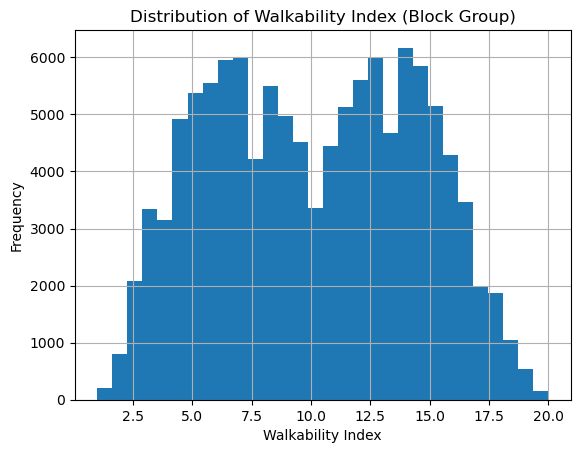

In [715]:
walk_nhgis['NatWalkInd'].hist(bins=30)
plt.title('Distribution of Walkability Index (Block Group)')
plt.xlabel('Walkability Index')
plt.ylabel('Frequency')
plt.show()

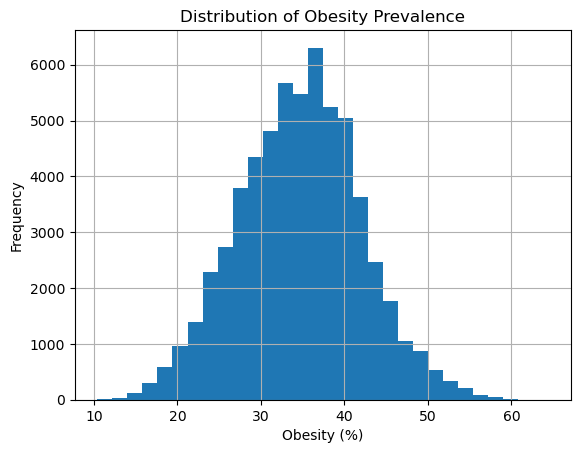

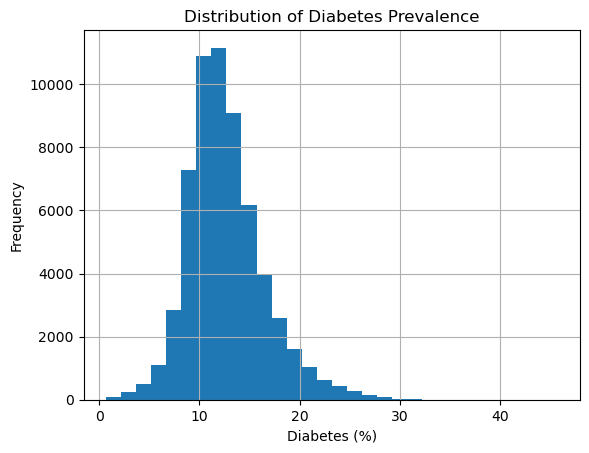

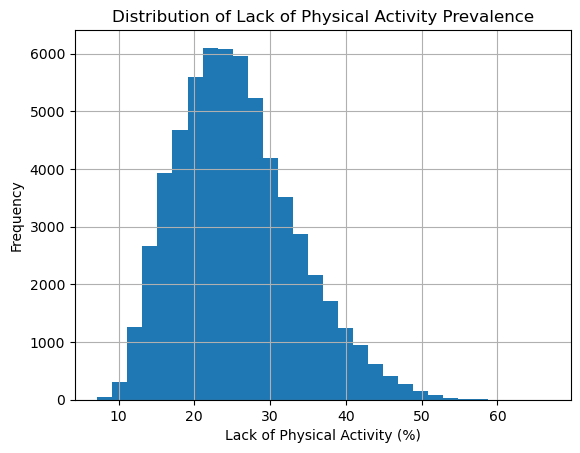

In [716]:
# Health Outcomes (walk_health)
walk_health['OBESITY_CrudePrev'].hist(bins=30)
plt.title('Distribution of Obesity Prevalence')
plt.xlabel('Obesity (%)')
plt.ylabel('Frequency')
plt.show()

walk_health['DIABETES_CrudePrev'].hist(bins=30)
plt.title('Distribution of Diabetes Prevalence')
plt.xlabel('Diabetes (%)')
plt.ylabel('Frequency')
plt.show()

walk_health['LPA_CrudePrev'].hist(bins=30)
plt.title('Distribution of Lack of Physical Activity Prevalence')
plt.xlabel('Lack of Physical Activity (%)')
plt.ylabel('Frequency')
plt.show()

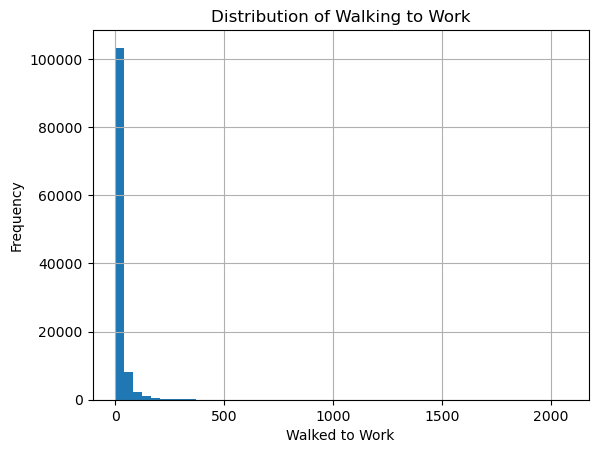

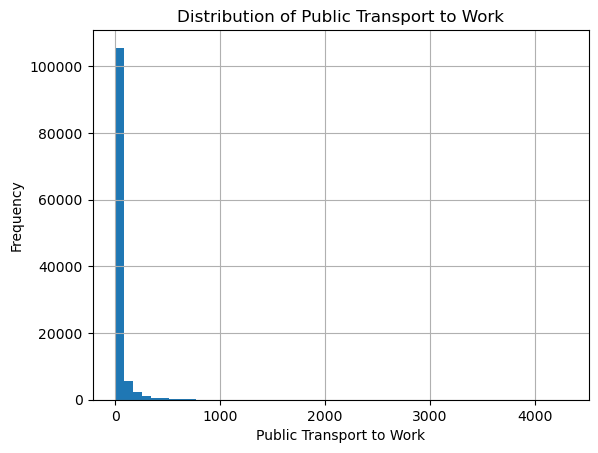

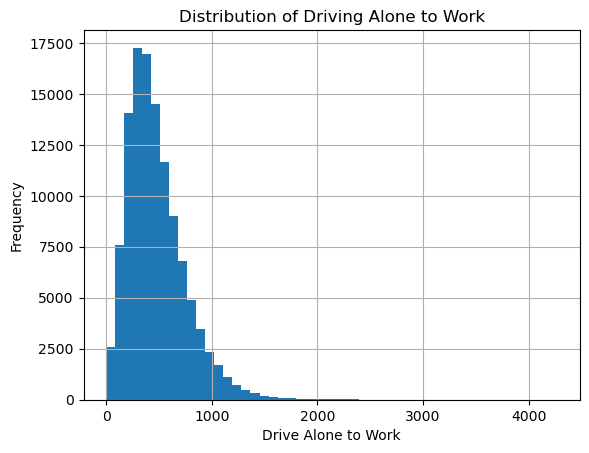

In [717]:
# Commute Outcomes (walk_nhgis)
walk_nhgis['Walked'].hist(bins=50)
plt.title('Distribution of Walking to Work')
plt.xlabel('Walked to Work')
plt.ylabel('Frequency')
plt.show()

walk_nhgis['Public_Transportation'].hist(bins=50)
plt.title('Distribution of Public Transport to Work')
plt.xlabel('Public Transport to Work')
plt.ylabel('Frequency')
plt.show()

walk_nhgis['Drive_Alone'].hist(bins=50)
plt.title('Distribution of Driving Alone to Work')
plt.xlabel('Drive Alone to Work')
plt.ylabel('Frequency')
plt.show()

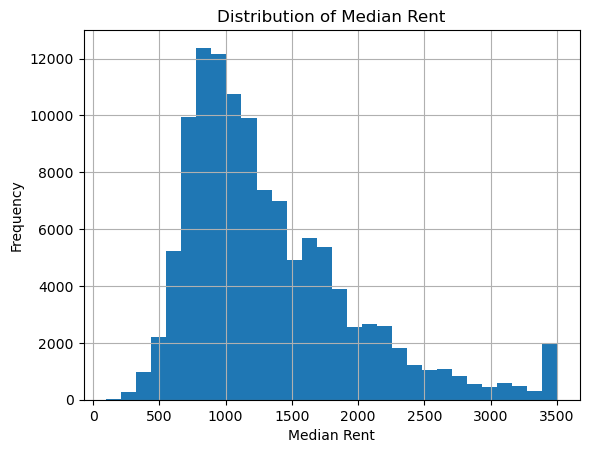

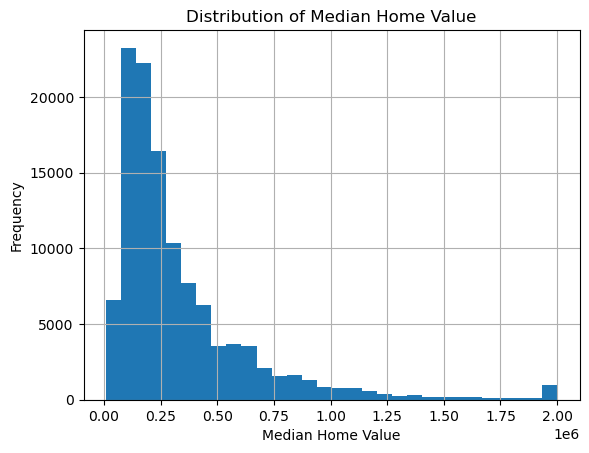

In [718]:
# Housing Outcomes (walk_nhgis)
walk_nhgis['Median_Rent'].hist(bins=30)
plt.title('Distribution of Median Rent')
plt.xlabel('Median Rent')
plt.ylabel('Frequency')
plt.show()

walk_nhgis['Median_Home_Value'].hist(bins=30)
plt.title('Distribution of Median Home Value')
plt.xlabel('Median Home Value')
plt.ylabel('Frequency')
plt.show()

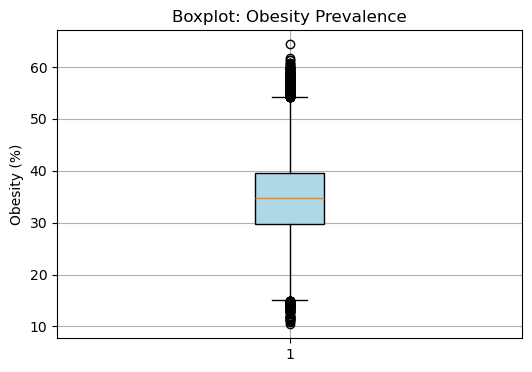

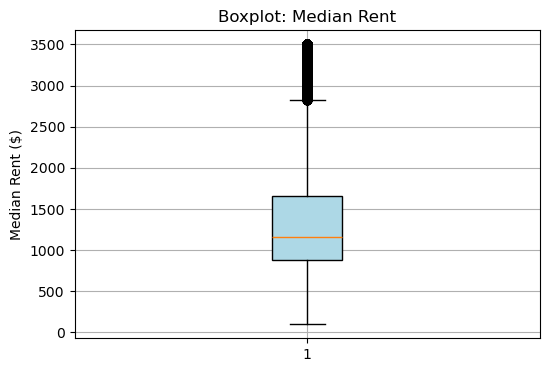

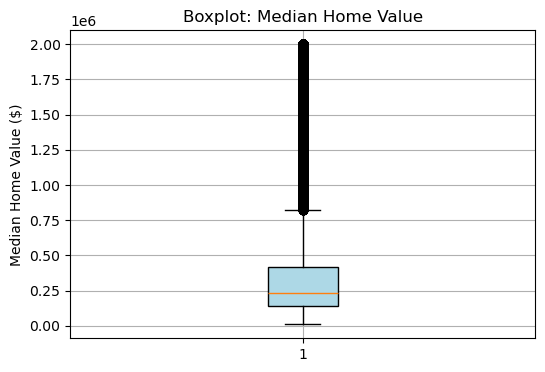

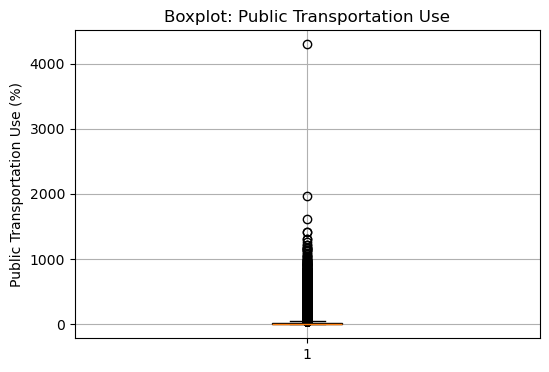

In [719]:
def boxplot_variable(df, column, title, ylabel):
    plt.figure(figsize=(6, 4))
    
    # Drop NaN values
    data = df[column].dropna()
    
    plt.boxplot(data, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# 1. Walkability vs Obesity
boxplot_variable(walk_health, 'OBESITY_CrudePrev', 'Boxplot: Obesity Prevalence', 'Obesity (%)')

# 2. Walkability vs Median Rent
boxplot_variable(walk_nhgis, 'Median_Rent', 'Boxplot: Median Rent', 'Median Rent ($)')

# 3. Walkability vs Median Home Value
boxplot_variable(walk_nhgis, 'Median_Home_Value', 'Boxplot: Median Home Value', 'Median Home Value ($)')

# 4. Walkability vs Public Transportation Use
boxplot_variable(walk_nhgis, 'Public_Transportation', 'Boxplot: Public Transportation Use', 'Public Transportation Use (%)')

In [720]:
def count_outliers(series):
    series = series.dropna()  # Drop NaNs first
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    
    return len(outliers), outliers

# 1. Obesity
outlier_count_obesity, obesity_outliers = count_outliers(walk_health['OBESITY_CrudePrev'])
print(f'Obesity Outliers: {outlier_count_obesity}')

# 2. Median Rent
outlier_count_rent, rent_outliers = count_outliers(walk_nhgis['Median_Rent'])
print(f'Median Rent Outliers: {outlier_count_rent}')

# 3. Median Home Value
outlier_count_home_value, home_value_outliers = count_outliers(walk_nhgis['Median_Home_Value'])
print(f'Median Home Value Outliers: {outlier_count_home_value}')

# 4. Public Transportation Use
outlier_count_public_transport, public_transport_outliers = count_outliers(walk_nhgis['Public_Transportation'])
print(f'Public Transportation Use Outliers: {outlier_count_public_transport}')

Obesity Outliers: 373
Median Rent Outliers: 4338
Median Home Value Outliers: 8566
Public Transportation Use Outliers: 16659


In [721]:
def get_outlier_mask(series):
    series = series.dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    mask = (series < lower_bound) | (series > upper_bound)
    return mask

# For walk_health (Obesity)
obesity_outlier_mask = get_outlier_mask(walk_health['OBESITY_CrudePrev'])

# For walk_nhgis (Public Transportation)
public_transport_outlier_mask = get_outlier_mask(walk_nhgis['Public_Transportation'])

# Drop rows where Obesity is an outlier
walk_health = walk_health[~obesity_outlier_mask].reset_index(drop=True)

# Drop rows where Public Transportation Use is an outlier
walk_nhgis = walk_nhgis[~public_transport_outlier_mask].reset_index(drop=True)

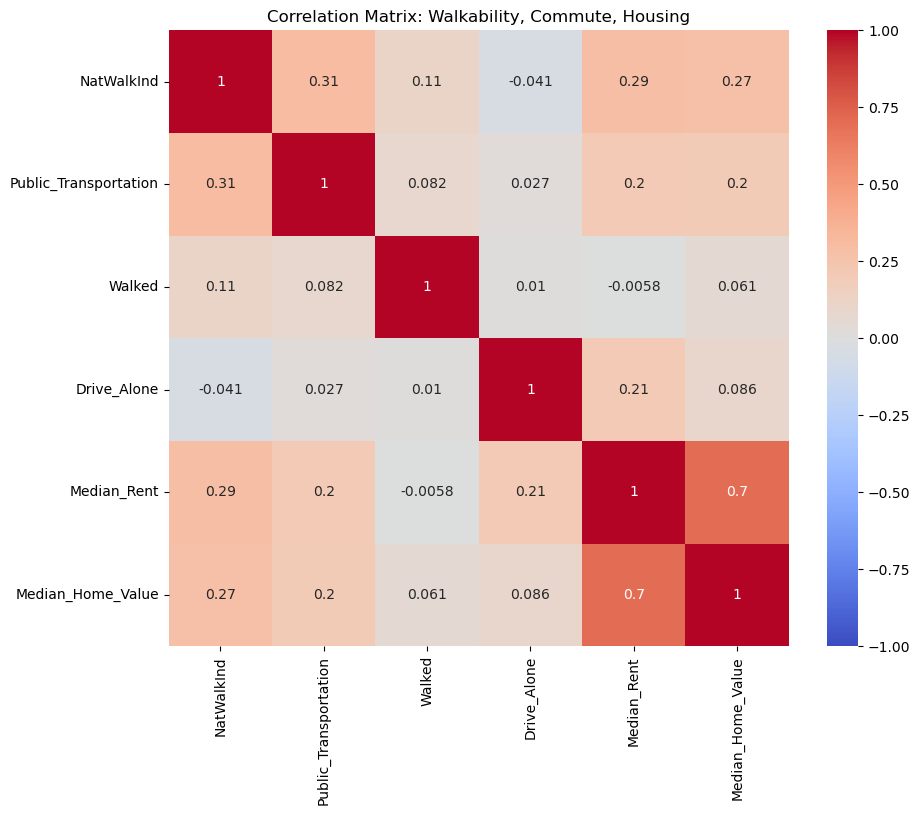

In [722]:
# For commute and housing
commute_housing_vars = ['NatWalkInd', 'Public_Transportation', 'Walked', 'Drive_Alone', 'Median_Rent', 'Median_Home_Value']

corr_nhgis = walk_nhgis[commute_housing_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_nhgis, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Walkability, Commute, Housing')
plt.show()

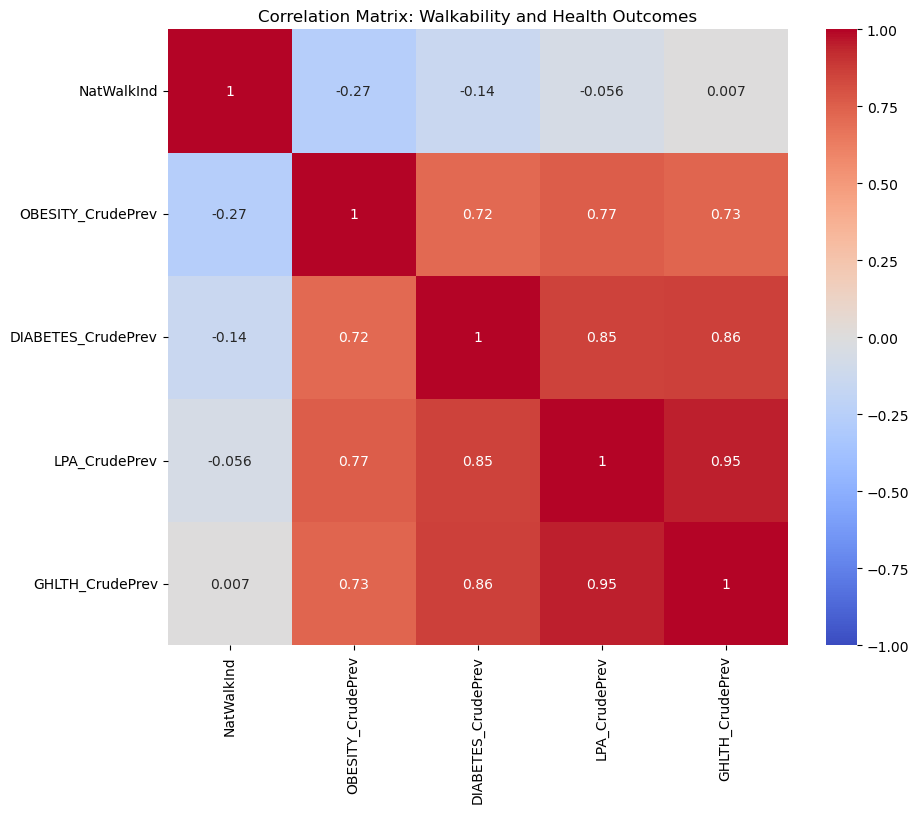

In [723]:
# For health outcomes
health_vars = ['NatWalkInd', 'OBESITY_CrudePrev', 'DIABETES_CrudePrev', 'LPA_CrudePrev', 'GHLTH_CrudePrev']

corr_health = walk_health[health_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_health, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Walkability and Health Outcomes')
plt.show()

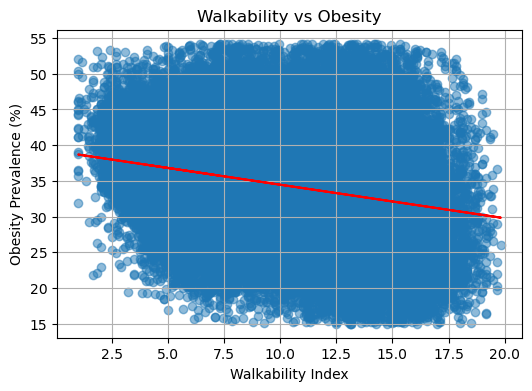

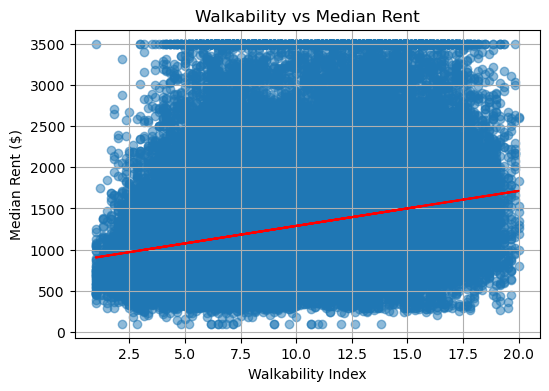

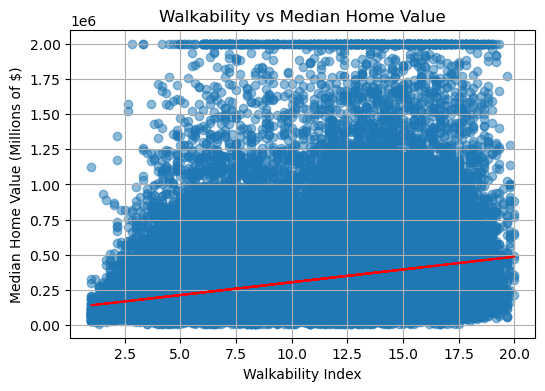

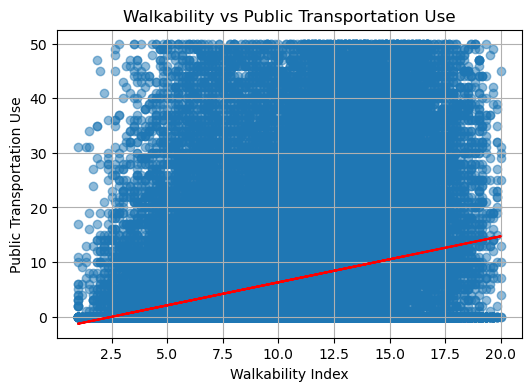

In [724]:
# Helper function to plot scatterplot with trendline
def scatter_with_trend(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, alpha=0.5)
    
    # Add trendline
    m, b = np.polyfit(x, y, 1)  # Linear fit (degree=1)
    plt.plot(x, m*x + b, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# 1. Walkability vs Obesity
scatter_with_trend(
    walk_health['NatWalkInd'], 
    walk_health['OBESITY_CrudePrev'], 
    'Walkability vs Obesity',
    'Walkability Index',
    'Obesity Prevalence (%)'
)

# 2. Walkability vs Median Rent
scatter_with_trend(
    walk_nhgis['NatWalkInd'], 
    walk_nhgis['Median_Rent'], 
    'Walkability vs Median Rent',
    'Walkability Index',
    'Median Rent ($)'
)

# 3. Walkability vs Median Home Value
scatter_with_trend(
    walk_nhgis['NatWalkInd'], 
    walk_nhgis['Median_Home_Value'], 
    'Walkability vs Median Home Value',
    'Walkability Index',
    'Median Home Value (Millions of $)'
)

# 4. Walkability vs Public Transportation Use
scatter_with_trend(
    walk_nhgis['NatWalkInd'], 
    walk_nhgis['Public_Transportation'], 
    'Walkability vs Public Transportation Use',
    'Walkability Index',
    'Public Transportation Use'
)

### Linear Regression Models

In [726]:
import statsmodels.api as sm

In [727]:
def run_regression(X, y, title):
    # Add constant for intercept
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\nRegression: {title}")
    print(model.summary())

# Example usage:
run_regression(walk_health['NatWalkInd'], walk_health['OBESITY_CrudePrev'], 'Walkability vs Obesity')

run_regression(walk_nhgis['NatWalkInd'], walk_nhgis['Walked'], 'Walkability vs Walk to Work')

run_regression(walk_nhgis['NatWalkInd'], walk_nhgis['Drive_Alone'], 'Walkability vs Drive Alone to Work')

run_regression(walk_nhgis['NatWalkInd'], walk_nhgis['Median_Rent'], 'Walkability vs Median Rent')

run_regression(walk_nhgis['NatWalkInd'], walk_nhgis['Median_Home_Value'], 'Walkability vs Median Home Value')


Regression: Walkability vs Obesity
                            OLS Regression Results                            
Dep. Variable:      OBESITY_CrudePrev   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     4538.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:15:03   Log-Likelihood:            -2.0017e+05
No. Observations:               59795   AIC:                         4.003e+05
Df Residuals:                   59793   BIC:                         4.004e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39

### Map Visualization

In [729]:
import geopandas as gpd
from shapely import wkt

In [731]:
# Convert the string "POINT (lon lat)" into real shapely Point objects
walk_health['geometry'] = walk_health['Geolocation'].apply(wkt.loads)

walk_health_gdf = gpd.GeoDataFrame(walk_health, geometry='geometry', crs="EPSG:4326")

In [735]:
# Print coordinate bounds
print(walk_health_gdf.total_bounds)

[-166.7709793   19.3372688  178.338813    71.2875189]


In [739]:
# Create Longitude and Latitude columns if not yet created
walk_health_gdf['Longitude'] = walk_health_gdf.geometry.x
walk_health_gdf['Latitude'] = walk_health_gdf.geometry.y

# Find truly weird points (bad if not within reasonable U.S. + territories bounds)
weird_points = walk_health_gdf[
    (walk_health_gdf['Longitude'] > -60) |   # East of Maine (bad)
    (walk_health_gdf['Longitude'] < -180) |  # Beyond Aleutians (bad)
    (walk_health_gdf['Latitude'] < 18) |     # Below Puerto Rico (bad)
    (walk_health_gdf['Latitude'] > 72)       # Above Alaska's north slope (bad)
]

print(f"Number of truly weird points: {len(weird_points)}")
print(weird_points[['Longitude', 'Latitude']])

Number of truly weird points: 1
      Longitude   Latitude
894  178.338813  51.959447


In [741]:
# Drop the bad row
walk_health_gdf = walk_health_gdf.drop(index=894).reset_index(drop=True)

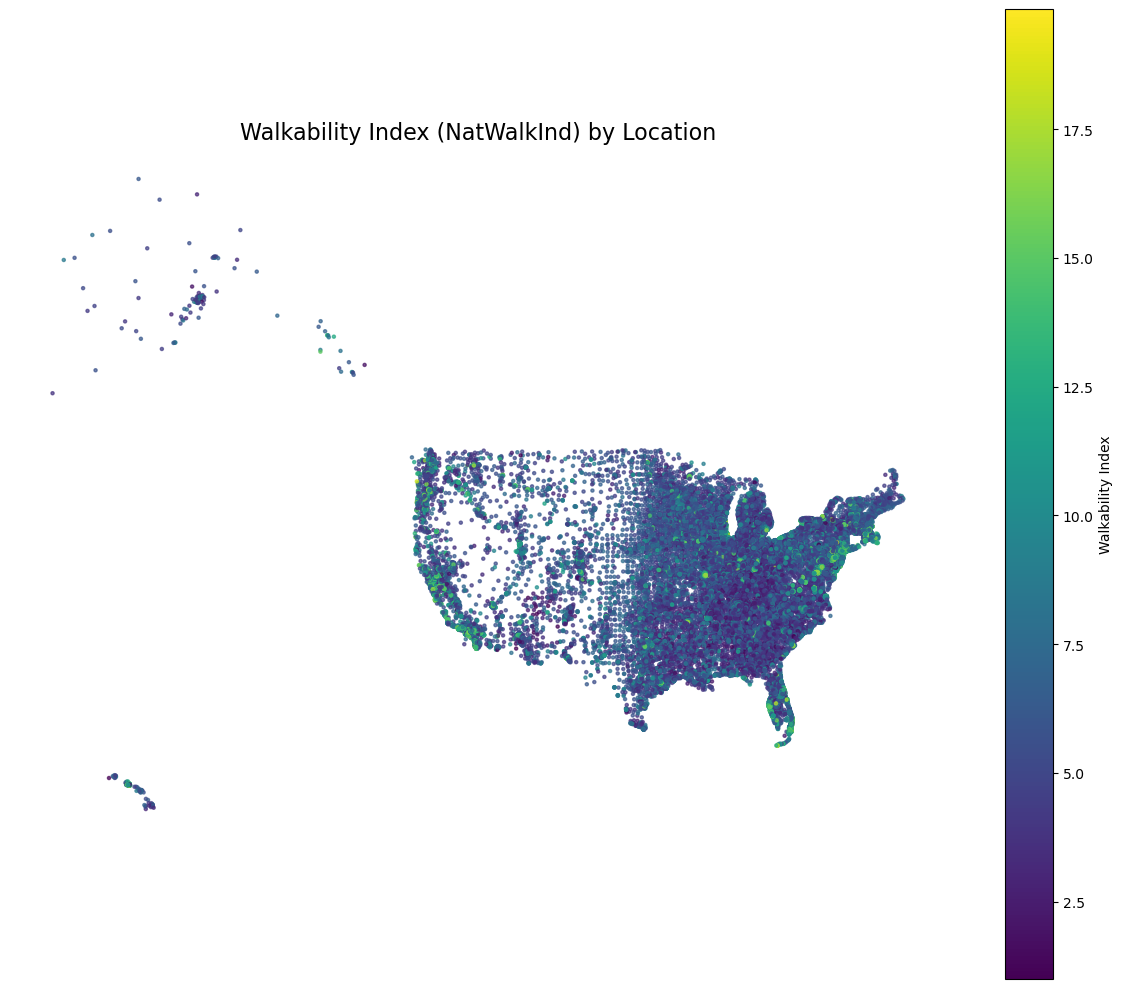

In [745]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

walk_health_gdf.plot(
    ax=ax,
    column='NatWalkInd',
    cmap='viridis',
    markersize=5,
    alpha=0.7,
    legend=True,
    legend_kwds={'label': "Walkability Index"},
    #edgecolor='k'
)

ax.set_title('Walkability Index (NatWalkInd) by Location', fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()

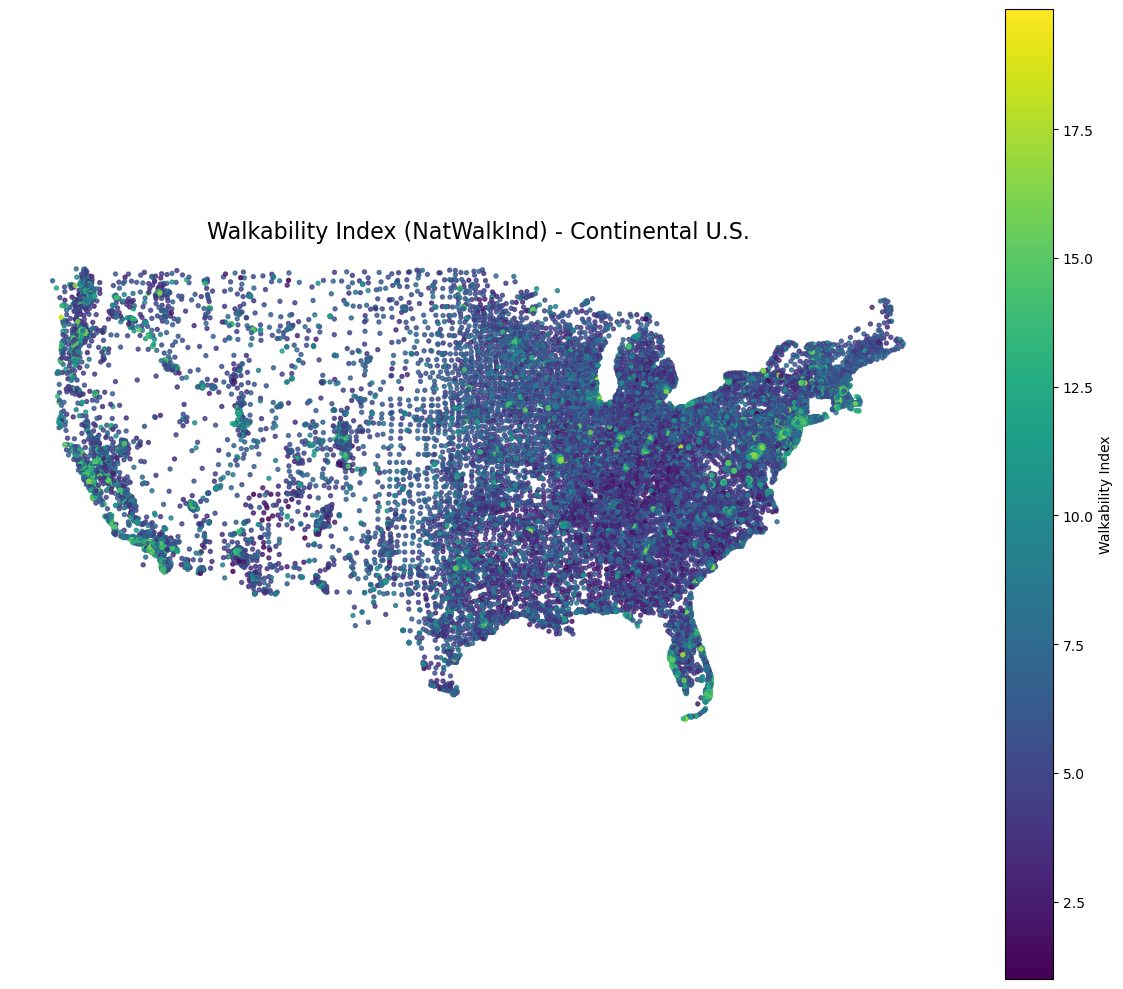

In [747]:
# Filter for Continental U.S. only (Lower 48)
walk_health_conus = walk_health_gdf[
    (walk_health_gdf['Longitude'] >= -125) & (walk_health_gdf['Longitude'] <= -65) &
    (walk_health_gdf['Latitude'] >= 24) & (walk_health_gdf['Latitude'] <= 50)
].reset_index(drop=True)


fig, ax = plt.subplots(1, 1, figsize=(12, 10))

walk_health_conus.plot(
    ax=ax,
    column='NatWalkInd',
    cmap='viridis',
    markersize=8,  # Slightly bigger points now
    alpha=0.8,
    legend=True,
    legend_kwds={'label': "Walkability Index"}
)

ax.set_title('Walkability Index (NatWalkInd) - Continental U.S.', fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.savefig('Walkability_Map_ContinentalUS.png', dpi=300)

plt.show()